# (Loan Data from prosper)
## by Amira Yousif Mohamed

## Preliminary Wrangling

> This document explores a dataset containing  113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate)
 trying to explore the following :
 -What affects the borrower’s APR or interest rate?
 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset
loans_df=pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loans_df.shape)
print(loans_df.dtypes)
print(loans_df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#Feaures of interset are (ListingKey,Term ,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate APR,ListingCategory,BorrowerState
#,EmploymentStatus,IsBorrowerHomeowner,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,IncomeRange)
cols=['ListingKey','Term' ,'LoanStatus','ClosedDate','BorrowerAPR','BorrowerRate','BorrowerState'
,'EmploymentStatus','IsBorrowerHomeowner','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','IncomeRange','LoanOriginalAmount']
loans_sub=loans_df[cols]
loans_sub.head()


,ListingKey,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),IncomeRange,LoanOriginalAmount
0,1021339766868145413AB3B,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Self-employed,True,NaN,NaN,NaN,0,"$25,000-49,999",9425
1,10273602499503308B223C1,36,Current,NaN,0.12016,0.0920,CO,Employed,False,6.0,A,7.0,2,"$50,000-74,999",10000
2,0EE9337825851032864889A,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Not available,False,NaN,NaN,NaN,0,Not displayed,3001
3,0EF5356002482715299901A,36,Current,NaN,0.12528,0.0974,GA,Employed,True,6.0,A,9.0,16,"$25,000-49,999",10000
4,0F023589499656230C5E3E2,36,Current,NaN,0.24614,0.2085,MN,Employed,True,3.0,D,4.0,2,"$100,000+",15000


In [6]:
loans_sub.ListingKey.shape[0]
loans_sub.shape[1]

15

In [7]:
loans_sub.EmploymentStatus.value_counts()
loans_sub.IsBorrowerHomeowner.value_counts()
loans_sub.LoanStatus.value_counts()
loans_sub.BorrowerState.value_counts().shape[0]
loans_sub.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

### What is the structure of your dataset?

> There are 113937 loans in the dataset with 15 features . Most variables are numeric in nature, but the variables BorrowerState,EmploymentStatus,IsBorrowerHomeowner ,LoanStatus,incomeRange are catigorical  variables with the following levels.


BorrowerState:51 category
EmploymentStatus: Employed,Full-time,Self-employed, Not available,Other,Part-time,Not employed ,Retired 
IsBorrowerHomeowner: True,False
LoanStatus:Current ,Completed,Chargedoff,Defaulted,  Past Due (1-15 days) ,Past Due (31-60 days),  Past Due (61-90 days), Past Due (91-120 days), Past Due (16-30 days) ,FinalPaymentInProgress ,Past Due (>120 days), Cancelled 

income Range:$25,000-49,999 ,$50,000-74,999,$100,000+,$75,000-99,999,Not displayed,$1-24,999,Not employed,$0 

ListingCategory: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
### What is/are the main feature(s) of interest in your dataset?

> 'm most interested in figuring out what features are best for predicting the borrower’s APR

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i think IncomeRange,employment statuse,owning a home or not , terms of loan,loan amount will affect the APR

In [8]:
#change inappropriat column names
#ListingCategory (numeric) , ProsperRating (numeric), ProsperRating (Alpha)
loans_sub.rename(columns = {'ListingCategory (numeric)':'ListingCategory','ProsperRating (numeric)':'ProsperRating','ProsperRating (Alpha)':'ProsperRating_letters'}, inplace = True)

C:\Users\amira\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
#Cleaning Null values of APR

loans_sub= loans_sub[loans_sub['BorrowerAPR'].notna()]


In [10]:
loans_sub.head()

,ListingKey,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,ProsperRating,ProsperRating_letters,ProsperScore,ListingCategory,IncomeRange,LoanOriginalAmount
0,1021339766868145413AB3B,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Self-employed,True,NaN,NaN,NaN,0,"$25,000-49,999",9425
1,10273602499503308B223C1,36,Current,NaN,0.12016,0.0920,CO,Employed,False,6.0,A,7.0,2,"$50,000-74,999",10000
2,0EE9337825851032864889A,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Not available,False,NaN,NaN,NaN,0,Not displayed,3001
3,0EF5356002482715299901A,36,Current,NaN,0.12528,0.0974,GA,Employed,True,6.0,A,9.0,16,"$25,000-49,999",10000
4,0F023589499656230C5E3E2,36,Current,NaN,0.24614,0.2085,MN,Employed,True,3.0,D,4.0,2,"$100,000+",15000


In [11]:
#dropp

## Univariate Exploration

> i will start with our factors of interest Borrower APR

Text(0, 0.5, 'Count')

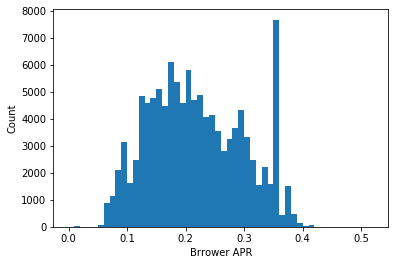

In [12]:
#BorrowerAPR
bins=np.arange(0,loans_sub.BorrowerAPR.max()+0.01,0.01)
plt.hist(data=loans_sub,x='BorrowerAPR',bins=bins);
plt.xlabel('Brrower APR')
plt.ylabel('Count')

The highest Apr Rate is at 0.35 approximately

next i will investigate factors that may affect APR first one is income range

Text(0.5, 0, 'Loans Count')

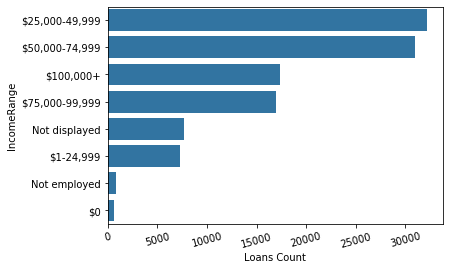

In [13]:
#income Range
order=loans_sub.IncomeRange.value_counts().index
color=sb.color_palette()[0]
sb.countplot(data=loans_sub,y='IncomeRange',color=color,order=order);
plt.xticks(rotation=15)
plt.xlabel('Loans Count')

>i observe that the loans are affected by income ranges the lower incomes have higher loans count which make sense but i can also see that not employed and 0 incomes have lowest loans count .

next investigate original loan amount

Text(0, 0.5, 'Loans Count')

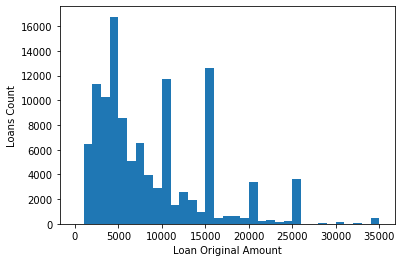

In [14]:
#LoanOriginalAmount
bins=np.arange(0,loans_sub.LoanOriginalAmount.max()+1000,1000)
plt.hist(data=loans_sub,x='LoanOriginalAmount',bins=bins);
plt.xlabel('Loan Original Amount')
plt.ylabel('Loans Count')

the highest loan amounts are around 5000 the second highest is between  15000 and 20000.

next invetigate employment status

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

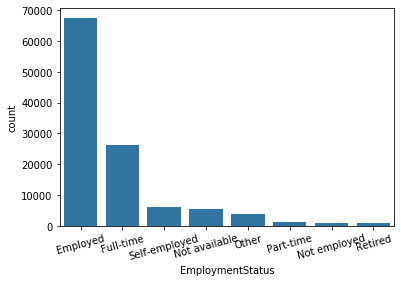

In [15]:
#employment status
index=loans_sub.EmploymentStatus.value_counts().index
sb.countplot(data=loans_sub,x='EmploymentStatus',color=color,order=index);
plt.xticks(rotation=15)

most loans are taken by Employed and full time pepole and least loans taken by retired and not employed this is expected.

next investigate effect of ownning homes or not

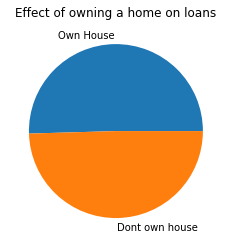

In [16]:
#IsBorrowerHomeowner

plt.pie(loans_sub.IsBorrowerHomeowner.value_counts(),labels=['Own House','Dont own house']);
plt.title('Effect of owning a home on loans');


owning a home or not is nearly equal statistics  for pepole who take loan so i think this might be un useful as i thought.

next i will investigate listing category


(0, 15)

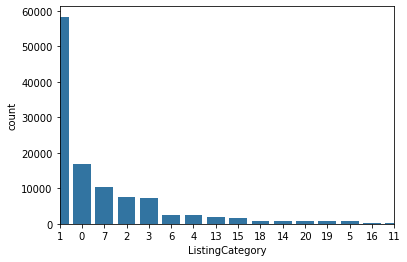

In [17]:
index=loans_sub['ListingCategory'].value_counts().index
sb.countplot(data=loans_sub,x='ListingCategory',color=color,order=index)
plt.xlim(0,15)

the highest listing category is [1] which is "Debt Consolidation" 

next investigate Term

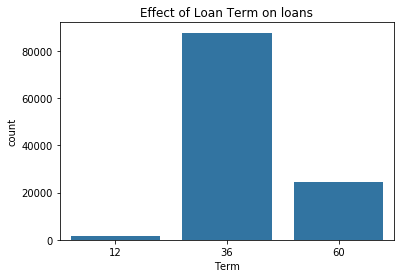

In [18]:
index=loans_sub['Term'].value_counts().index
sb.countplot(data=loans_sub,x='Term',color=color);
plt.title('Effect of Loan Term on loans');

most of loans terms require 36 months to be fully completed

investigate borrower state

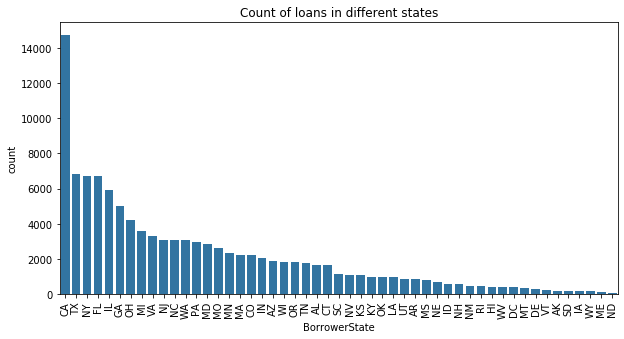

In [19]:
#BorrowerState
plt.figure(figsize=(10,5))
index=loans_sub['BorrowerState'].value_counts().index
sb.countplot(data=loans_sub,x='BorrowerState',color=color,order=index);
plt.xticks(rotation=90);
plt.title('Count of loans in different states');

highest state for taking loans is CA

next prosper rating

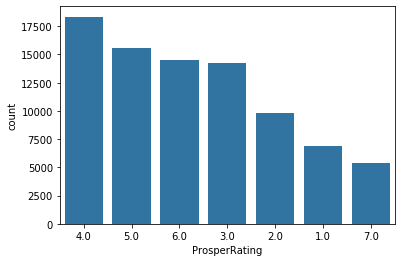

In [20]:
#ProsperRating
index=loans_sub['ProsperRating'].value_counts().index
sb.countplot(data=loans_sub,x='ProsperRating',color=color,order=index);


highest loan takers are form rating 4,5 which is medium risk . surprisingly that rating 1 which is lowest and rating 7 which is highest are both nearly equal in statistics


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the distribution of BorrowerAPR is  bimodal distribution the data were normally distributed along the start of x axis then had another peak at the end at value of .35. also rating 1, 7 are nearly equal in count while 7 is low risk should be higher in count.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i didn't perform any tidiness of data there was nothing unusual in most of them except for the
1-listing categroy were left skewed the Debt Consolidation reason stated is the highest count 
2-the loan amount also is not normally distrbuted as 5000 loan amount is the highest 
i didnt perform any transformation

## Bivariate Exploration

>To start off with, I want to look at the pairwise correlations present between features in the data.

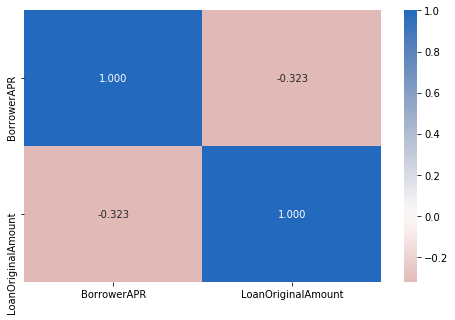

In [21]:
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount']
categoric_vars = ['ListingCategory', 'EmploymentStatus', 'IncomeRange','ProsperRating','Term']
plt.figure(figsize = [8, 5])
sb.heatmap(loans_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

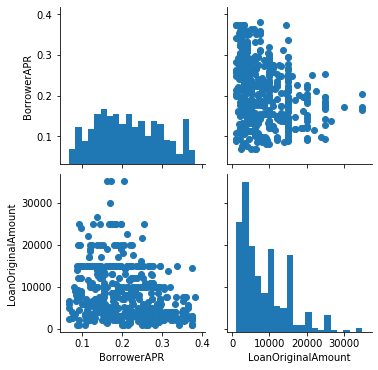

In [22]:
samples = np.random.choice(loans_sub.shape[0], 500, replace = False)
loans_samp = loans_sub.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [23]:
loans_drop=loans_sub.copy()

loans_drop= loans_drop[loans_drop['BorrowerState'].notna()]

len(loans_drop['BorrowerAPR']),len(loans_drop['BorrowerState'])

(108422, 108422)

i will take  a closer look at relation between loan amount and APR 

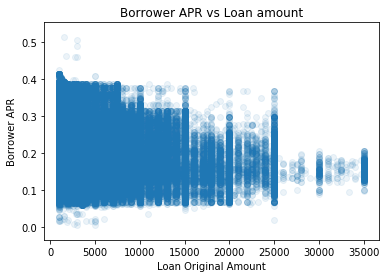

In [38]:
plt.scatter(data = loans_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR',alpha=1/12);
plt.xlabel('Loan Original Amount');
plt.title('Borrower APR vs Loan amount');
plt.ylabel('Borrower APR');

there is a negative relation between loan amount and APR 
so the more the loan amount, the lower the APR.

let's see the state with high aPR

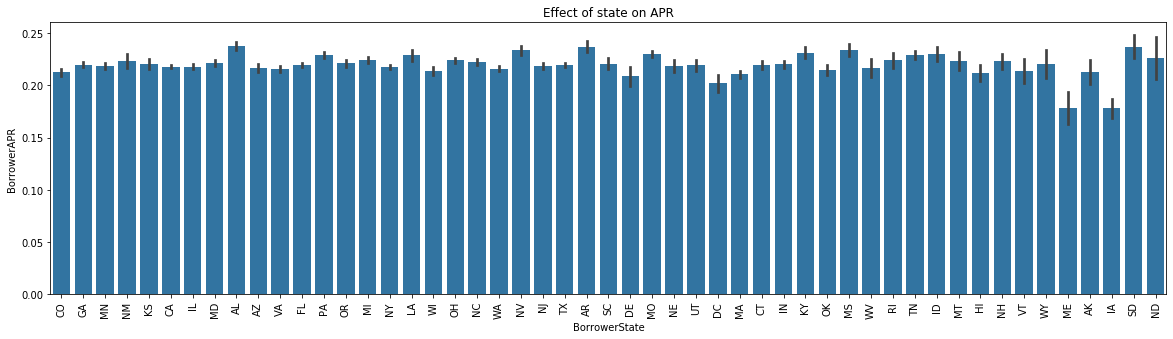

In [39]:

plt.figure(figsize=(20,5))
sb.barplot(data = loans_drop, x = 'BorrowerState',y='BorrowerAPR',color=color)
plt.xticks(rotation=90);
plt.title('Effect of state on APR');

seems like the state don't affect in borrowerAPR as most of states values are close

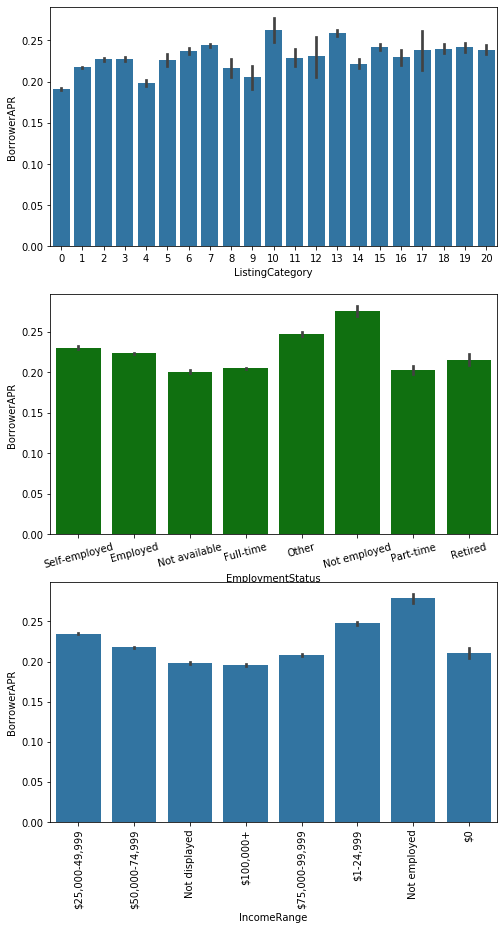

In [27]:
#['ListingCategory', 'EmploymentStatus', 'IncomeRange']
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 15])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.barplot(data = loans_sub, x = 'ListingCategory', y='BorrowerAPR', color = color)

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.barplot(data = loans_sub, x = 'EmploymentStatus', y = 'BorrowerAPR',color = 'green')
plt.xticks(rotation=15)
#ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.barplot(data = loans_sub, x = 'IncomeRange', y = 'BorrowerAPR', color = color)
plt.xticks(rotation=90)
#ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

subplot1:highest listing category is 10(cosmotic procedure) which is above 0.25 of APR . apr ranges from 0.19 to 0.25
subplot2:lowest Apr if for full time employees and highest APR is for un employed pepole
subplot3: as excepced in the income range vs APR- not employed take highest apr which is above 0.25 and the apr decrease with increase of income

 let's look at ProsperRating_letters vs APR

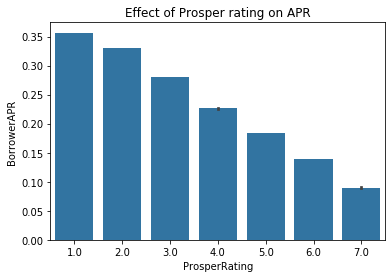

In [40]:
sb.barplot(data = loans_drop, x = 'ProsperRating',y='BorrowerAPR',color=color);
plt.title('Effect of Prosper rating on APR');

seems like apr is affected strongly with prosper rating. lower ratings take higher APR

next effect of listing category,Eployment statuse,prosper rating,Term on APR and loan amount

<Figure size 1440x720 with 0 Axes>

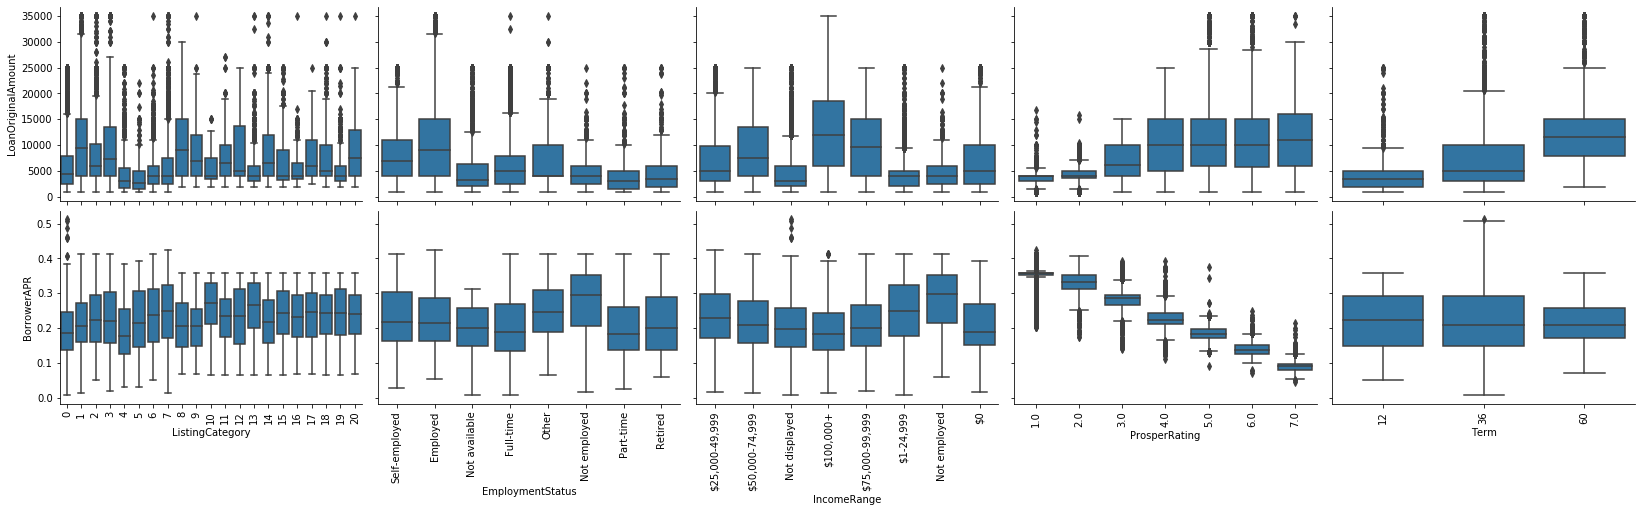

In [48]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);
 
plt.figure(figsize = [20, 10]);
g = sb.PairGrid(data = loans_sub, y_vars = [ 'LoanOriginalAmount','BorrowerAPR'], 
                x_vars = categoric_vars, height = 3, aspect = 1.5)

g.map(boxgrid);


#the figure shows that :
1-the borrower APR is afftected strongly by prosper rating negatively the better prosper rating category the APR gets lower.
 bad prosper ratings(1,2) get low loans amount but as the prosper ratings gets higher the  loan amount also go higher 
2-also there is a positive realtion between term and loan amount ,low amounts have lower terms 
3- strong relation between lisitng category and Loan amount,income ranges and loan amount

next  lets look at the relation between the 5 categorical variables we have

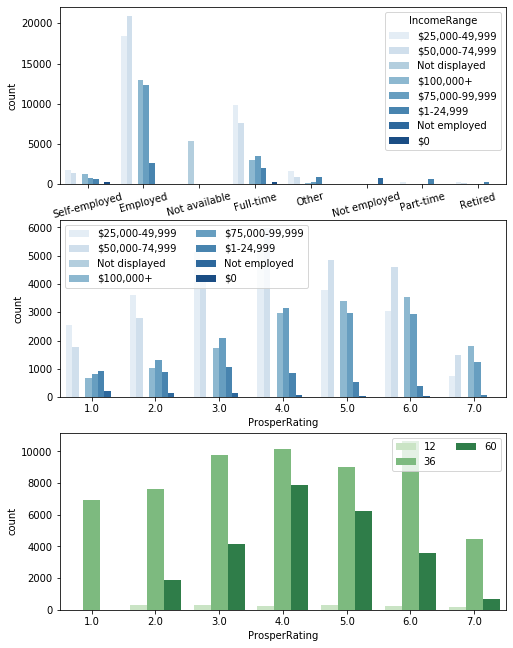

In [30]:
# ['ListingCategory', 'EmploymentStatus', 'IncomeRange','ProsperRating','Term']
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 15])

# subplot 1: EmploymentStatus vs income range
plt.subplot(4, 1, 1)
sb.countplot(data = loans_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation=15)
#plt.legend(location =1)
# subplot 2: prosper rating vs income range
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loans_sub, x = 'ProsperRating', hue = 'IncomeRange', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: ProsperRating vs term
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loans_sub, x = 'ProsperRating', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

subplot1:data is not enough for the employment status but Emplyed status have the highest count of income ranges(25000-74000)
and highest count of range(not employed)status whichh is confusing
subplot 2: prosper rating vs income range they have positive relation as the higher income range assigned with higher prosper rating(5,6) .
we can see that 7 prosper rating which is low risk have lower count  of the income ranges(25000-74000)
subplot 3: ProsperRating vs term hisghest term(60) has the highest count in the middle of prosper rating 

 
 ### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the borrower APR is afftected by preosper rating negatively the lower prosper rating category the APR gets higher.
>the borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.
>It also shows that borrowers with better rating also have larger monthly income and loan amount. 
>There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on 4 and 5 ratings. There is only 36 months loans for HR rating borrowers.

Multivariate Exploration

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Rating effect on APR and loan amount

C:\Users\amira\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


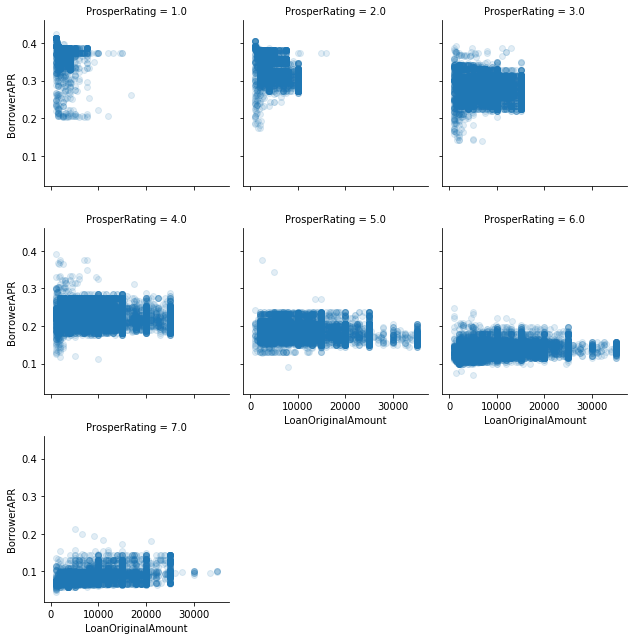

In [32]:

g = sb.FacetGrid(data = loans_sub, col = 'ProsperRating', col_wrap = 3, size = 3)
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerAPR',alpha=1/8)
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerAPR')

the prosper rating made the relation really clear between loan amount and APR
the low risk of rate 7 has lower APR and higher Loan amount
the highest risk is  1 has highest APR and lowest Loan amounts
so the better ratings get lower APR and higher loan amount
the ratings from(4-6) tend to have higer APR but they loan more amount ranges 

Term effect on APR and loan amount

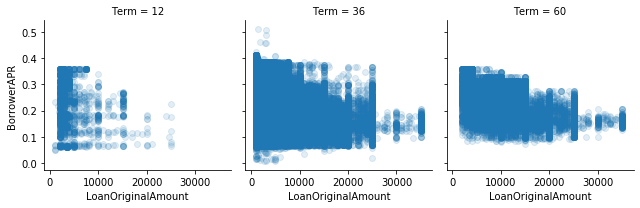

In [33]:
# create faceted heat maps on levels of Term
g = sb.FacetGrid(data = loans_sub, col = 'Term', col_wrap = 3, size = 3)
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerAPR',alpha=1/8)
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerAPR')

plt.show()

loan original amount and APR still have the same realtion as the bivariant plot before (lower amounts higher apr)
the range of loans amount in term 12 monthes is under 20000 with higher terms we can see higher amounts and lower APR
Term has no effect on the relation between loan amount and APR

prosper rating effect on loan amount and APR

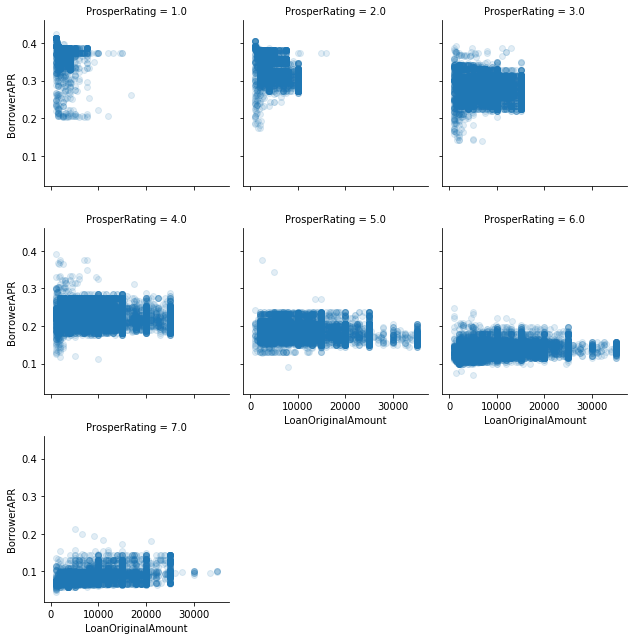

In [34]:
g = sb.FacetGrid(data = loans_sub, col = 'ProsperRating', col_wrap = 3, size = 3)
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerAPR',alpha=1/8)
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerAPR')

the effect of rating is obvious on the relation between loan amount and APR . as rating and loan increase apr decrease

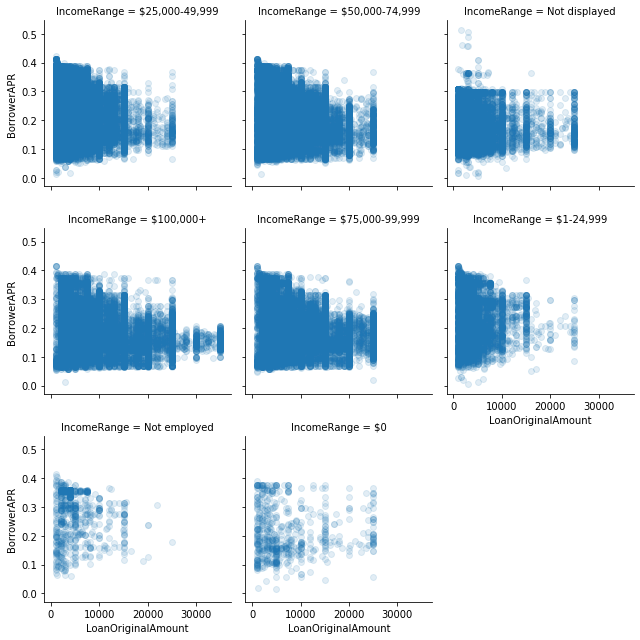

In [35]:
# ['ListingCategory', 'EmploymentStatus', 'IncomeRange','ProsperRating','Term']
g = sb.FacetGrid(data = loans_sub, col = 'IncomeRange', col_wrap = 3, size = 3)
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerAPR',alpha=1/8)
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerAPR')

income ranges affects the relation between apr and loan as for lower ranges loan amounts gets lower and apr is high which is compatible with the previouse statistics

next loan amount and APR across rating and income range

In [36]:
# select diamonds of approximately 1 carat
loans_flag = (loans_sub['LoanOriginalAmount'] >= 5000) & (loans_sub['LoanOriginalAmount']<= 20000)
loans_1c = loans_sub.loc[loans_flag,:]

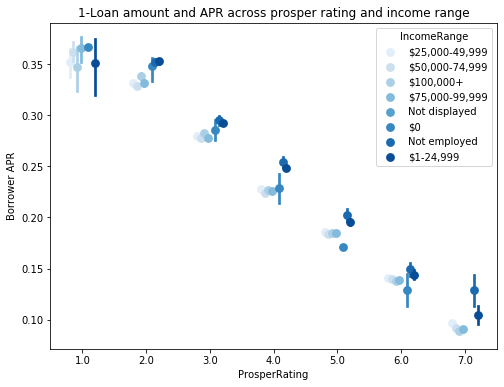

In [37]:
ig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans_1c, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('1-Loan amount and APR across prosper rating and income range')
plt.ylabel('Borrower APR')

ax.set_yticklabels([],minor = True)
plt.show();

A dodged point plot for loans between 5000 to 20000 shows the clear influence of rating and income ranges on Borrower APR.  There also appear to be fewer loans of not employed and 0 incomes on the higher prosper rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>i tok a closer look of  borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from 4 to 7. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases

### Were there any interesting or surprising interactions between features?

> A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from 1 to 3. Another interesting thing is that the borrower APR decrease with the increase of borrow term 